In [2]:
import os
os.chdir('/Users/ngdnhtien/Research/Codespace/bosonic/bqec@huikhoon')

import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import utility as ut
import constant as constant

%config InlineBackend.figure_formats = ['svg']

# Two-mode case

In [3]:
dim_a = 20
dim_c = 15

a = qt.tensor(qt.destroy(dim_a), qt.qeye(dim_c))
c = qt.tensor(qt.qeye(dim_a), qt.destroy(dim_c))

n_a = a.dag() * a
n_c = c.dag() * c

## Parameters

In [4]:
omega_10 = 4.936 # GHz
alpha = 0.168 # GHz

## Full Hamiltonian

In [5]:
r1 = 9.64
r2 = 0.08
r3 = 0
r4 = 0.064

In [6]:
delta_a = r1 * alpha
omega_a = omega_10 + delta_a
omega_c = omega_10 + alpha

delta_d = r2 * alpha
omega_d = omega_10 + delta_d

Omega_d = 1j * r3 * delta_d

g_a = r4 * delta_a 

H_cav = omega_a * n_a 
H_anc = omega_c * n_c - alpha * (c.dag() + c)**4 / 12
H_int = 1j * np.real(g_a) * (c - c.dag()) * (a.dag() + a)

H0 = H_cav + H_anc + H_int

def H1_coeff(t, args):
    return np.exp(1j * omega_d * t)

H1 = (c - c.dag()) * (np.conj(Omega_d))

def H2_coeff(t, args):
    return np.exp(-1j * omega_d * t)

H2 = - (c - c.dag()) * Omega_d

H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

In [7]:
psi0 = qt.tensor(qt.fock(dim_a, 5), qt.fock(dim_c, 0))
time_100 = np.linspace(0, 10, 100)
time_200 = np.linspace(0, 10, 200)

output = qt.mesolve(H, psi0, time, [np.sqrt(0.01)*a], [a.dag()*a, c.dag()*c])

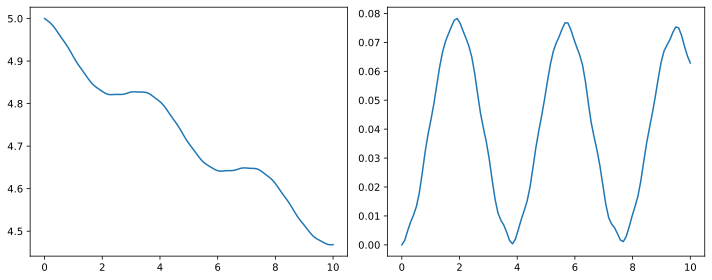

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

ax1.plot(time, output.expect[0])
ax2.plot(time, output.expect[1])

fig.tight_layout()